In [32]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest


In [33]:
with open("letter-recognition.names") as f:
    print(f.read())

1. Title: Letter Image Recognition Data 

2. Source Information
   -- Creator: David J. Slate
     -- Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201
   -- Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867   
   -- Date: January, 1991

3. Past Usage:
   -- P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91):
	"Letter Recognition Using Holland-style Adaptive Classifiers".

   	The research for this article investigated the ability of several
	variations of Holland-style adaptive classifier systems to learn to
	correctly guess the letter categories associated with vectors of 16
	integer attributes extracted from raster scan images of the letters.
	The best accuracy obtained was a little over 80%.  It would be
	interesting to see how well other methods do with the same data.

4. Relevant Information:

   The objective is to identify each of a large number of black-and-white
   rectangular pixel displays as one of the 26 capital letters in the English
 

In [34]:
#read dataframe
header = list(range(1, 17))
header = ["letter"] + header
df =  pd.read_csv('letter-recognition.data', sep=",", names = header)
df

,letter,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [35]:
#Check for missing values and datatypes
for i in df:
    print(df[i].isnull())

print(df.isnull().sum())
df.dtypes

#No missing values are found, the datatypes are correct for each column (object, int64)

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: letter, Length: 20000, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: 1, Length: 20000, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: 2, Length: 20000, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: 3, Length: 20000, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: 4, Length: 20000, dt

letter    object
1          int64
2          int64
3          int64
4          int64
5          int64
6          int64
7          int64
8          int64
9          int64
10         int64
11         int64
12         int64
13         int64
14         int64
15         int64
16         int64
dtype: object

In [36]:
#Descriptive statistics for each column
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


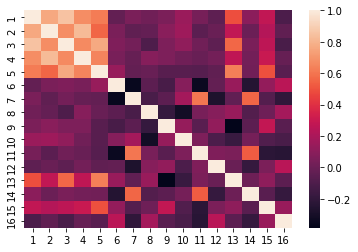

In [37]:
#Correlation matrix

corrmat = df.corr()
round(corrmat,2)
sns.heatmap(corrmat)
plt.show()
#First 5 columns are strongly correlated, which makes sense because there represent the width and height of the letters, as well as the vertical and horizontal positions of the box

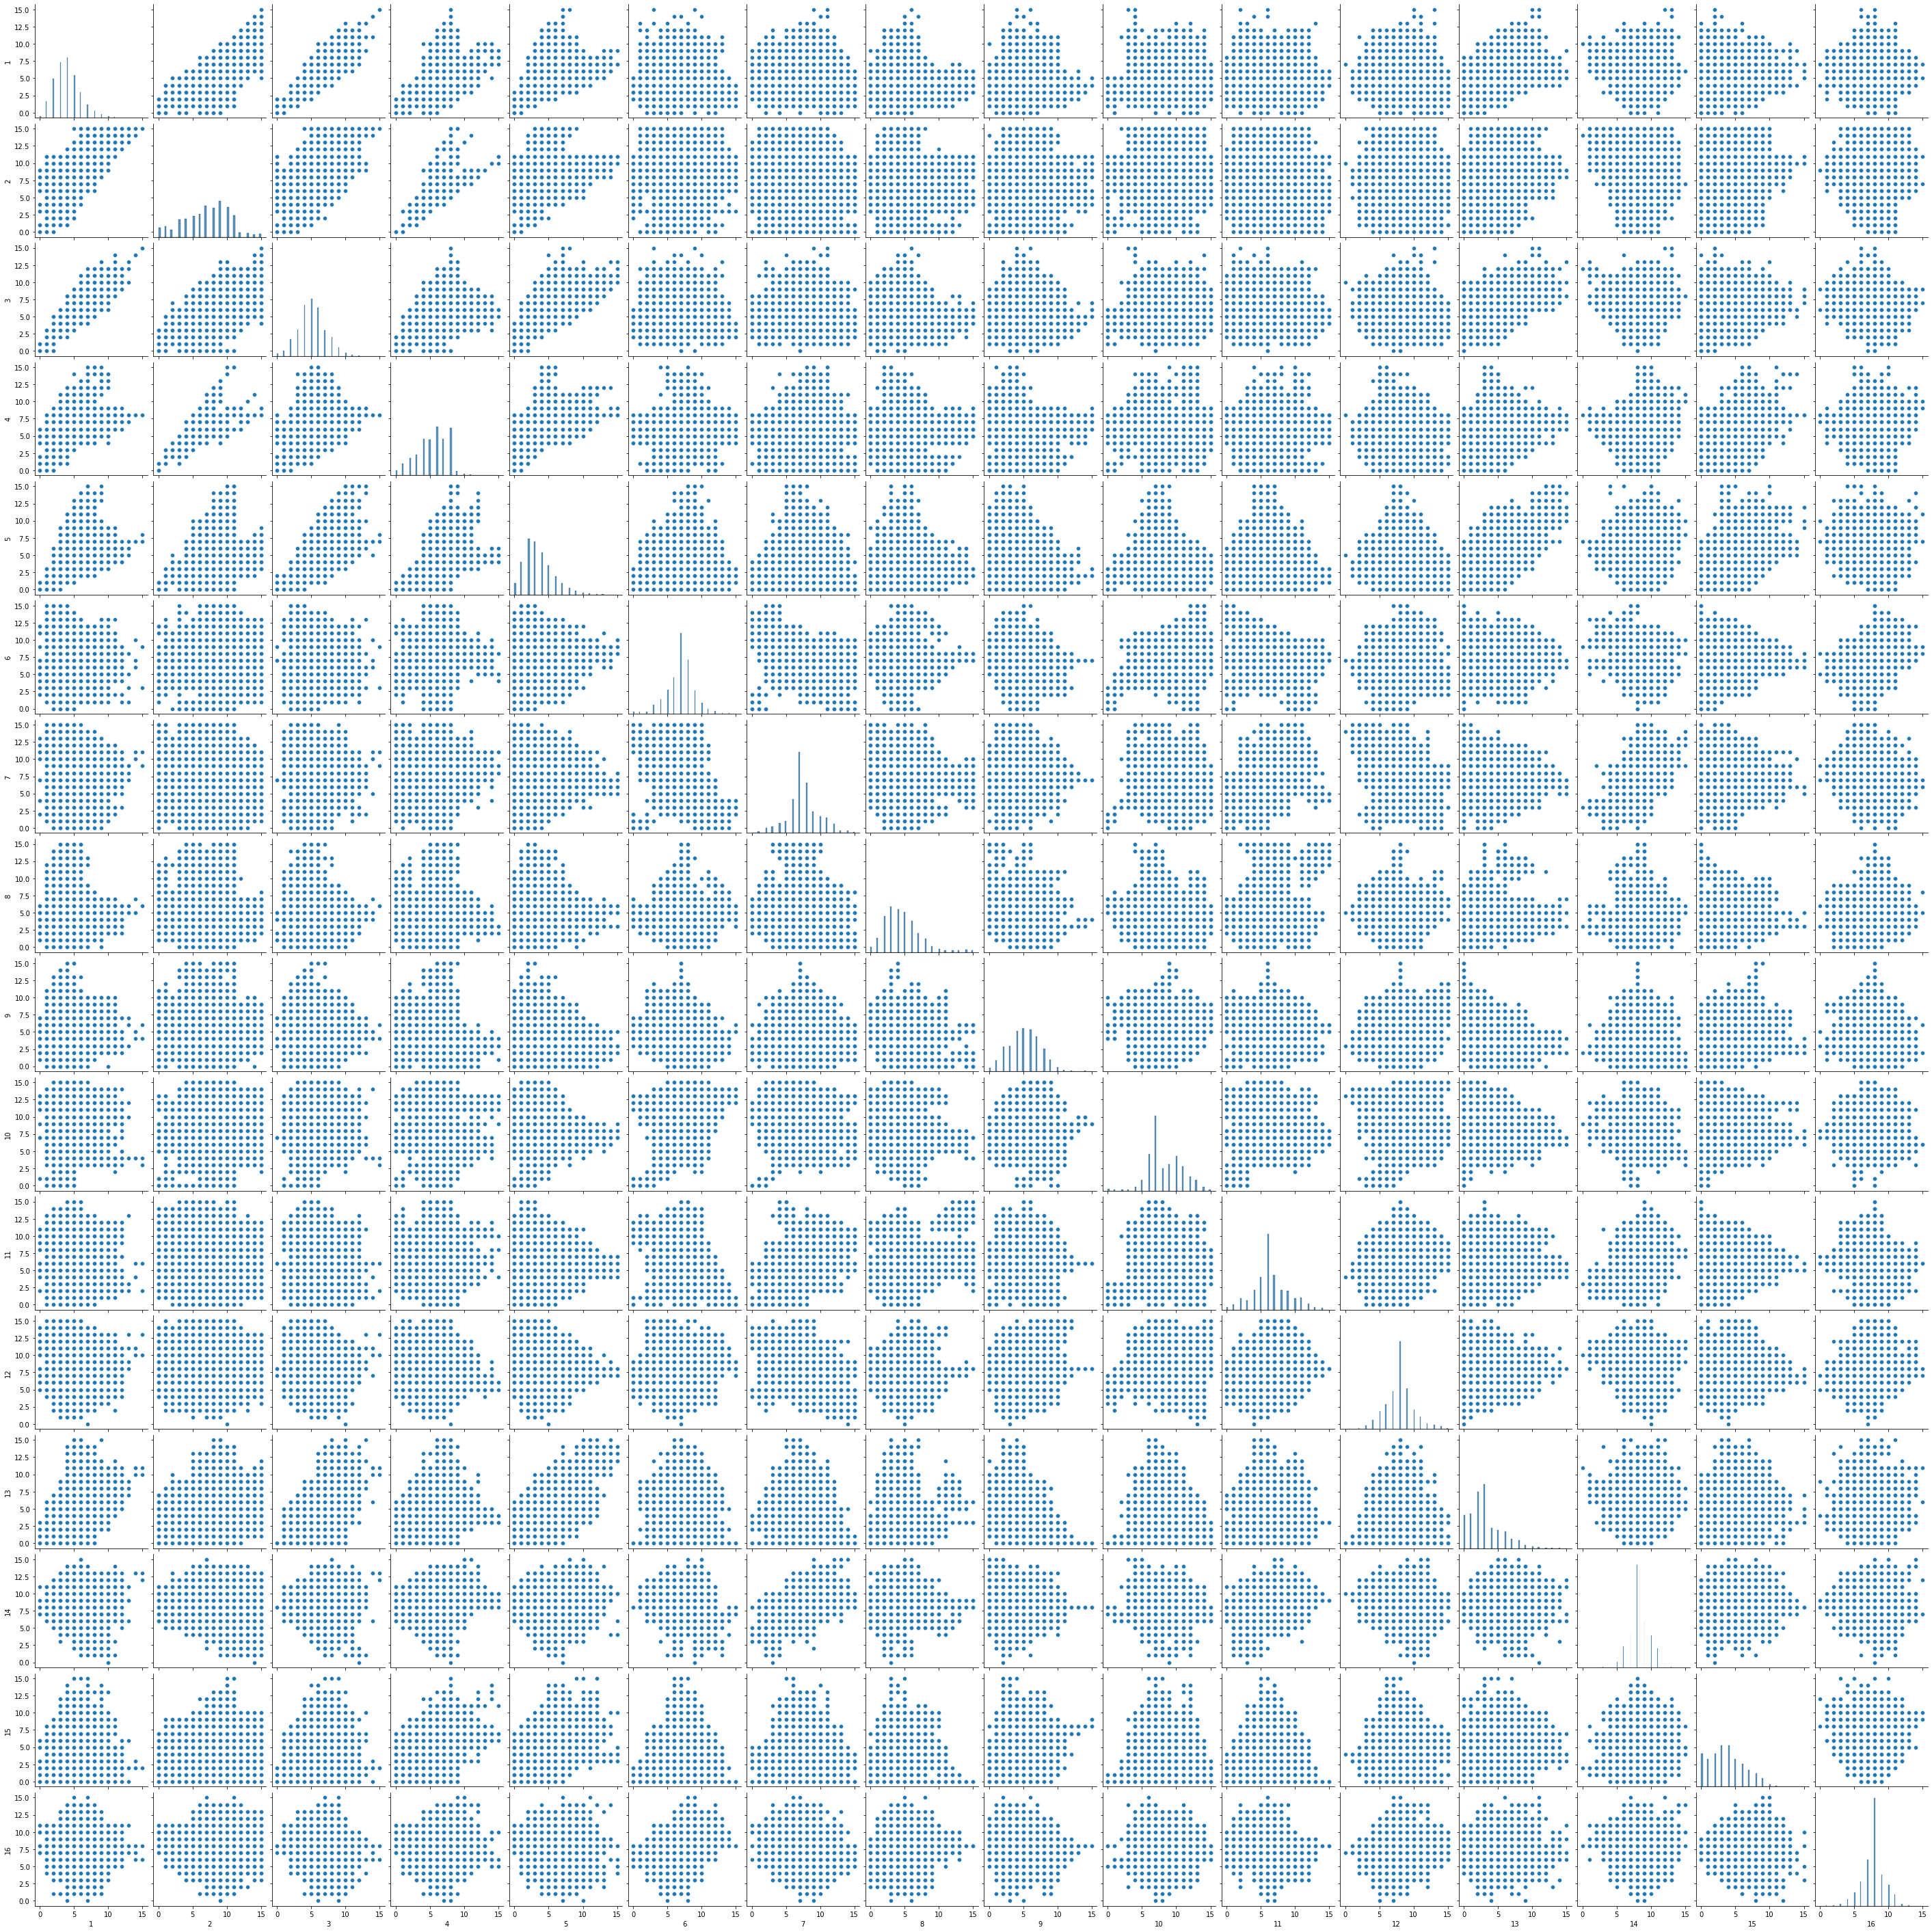

In [38]:
sns.pairplot(df)
plt.show()

In [40]:
#General analysis
def inspection(x_data):
    plt.figure()
    sns.displot(x_data, kde = True)
    plt.show()
    plt.figure()
    sns.boxplot(x_data)
    plt.show()
    print(np.mean(x_data))

<Figure size 432x288 with 0 Axes>

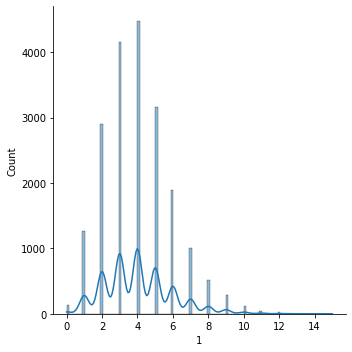

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


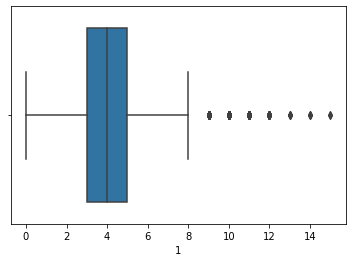

4.02355


<Figure size 432x288 with 0 Axes>

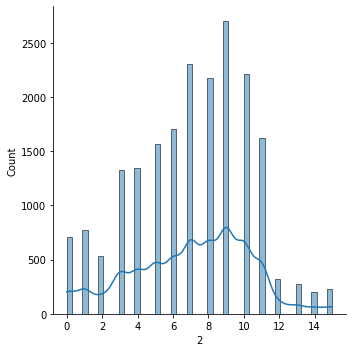

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


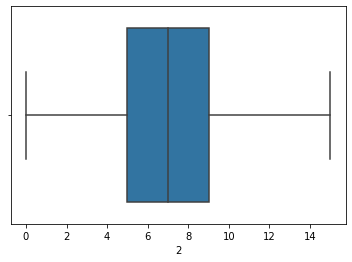

7.0355


<Figure size 432x288 with 0 Axes>

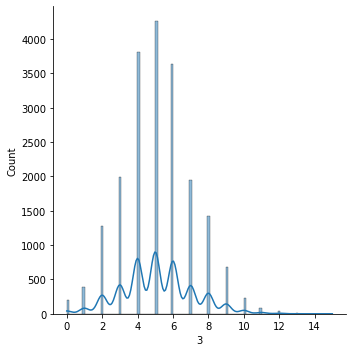

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


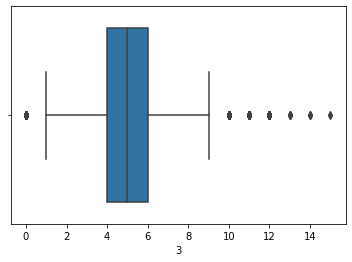

5.12185


<Figure size 432x288 with 0 Axes>

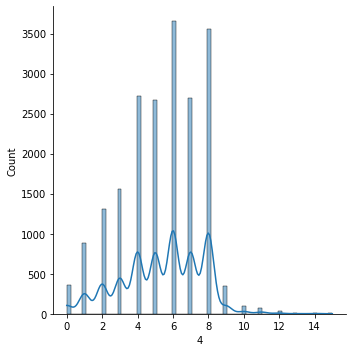

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


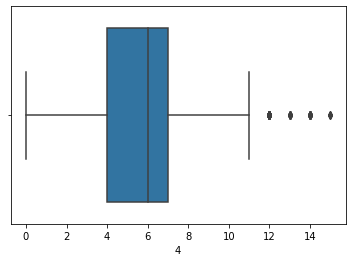

5.37245


<Figure size 432x288 with 0 Axes>

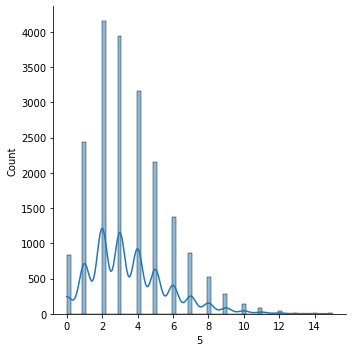

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


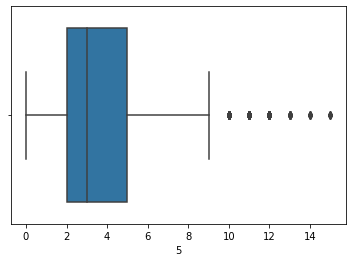

3.50585


<Figure size 432x288 with 0 Axes>

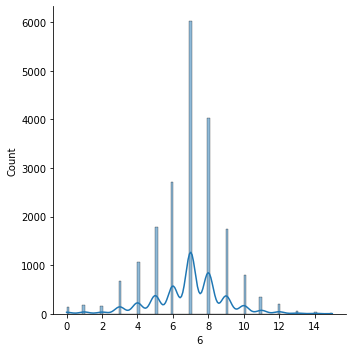

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


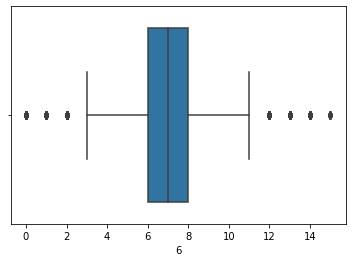

6.8976


<Figure size 432x288 with 0 Axes>

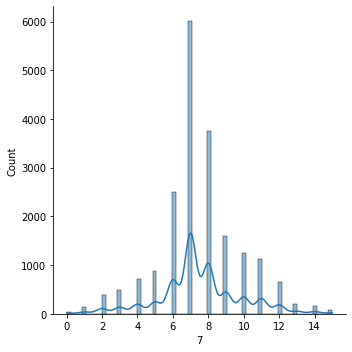

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


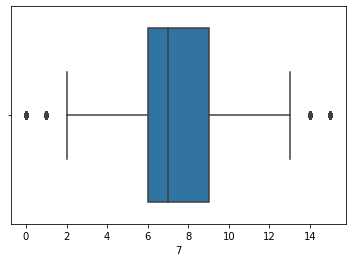

7.50045


<Figure size 432x288 with 0 Axes>

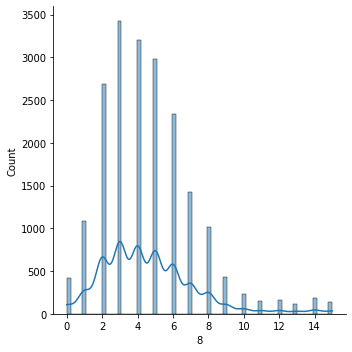

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


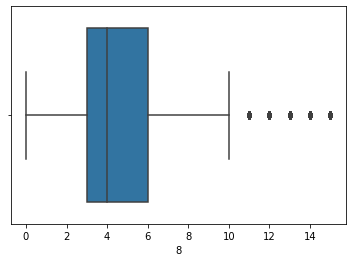

4.6286


<Figure size 432x288 with 0 Axes>

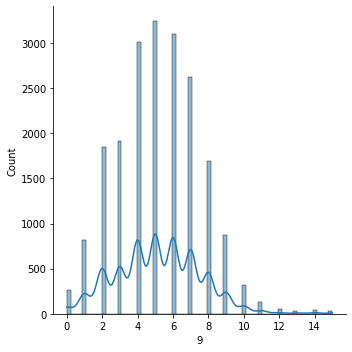

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


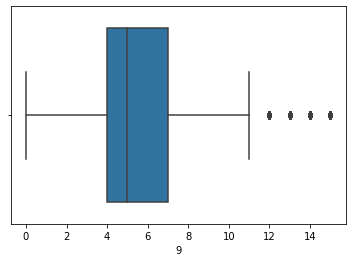

5.17865


<Figure size 432x288 with 0 Axes>

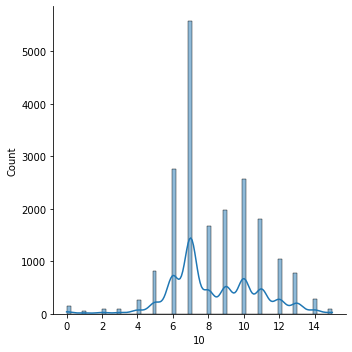

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


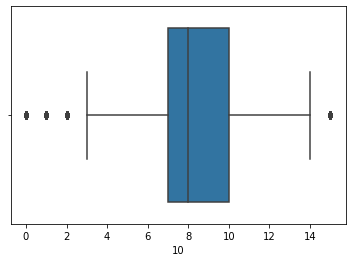

8.28205


<Figure size 432x288 with 0 Axes>

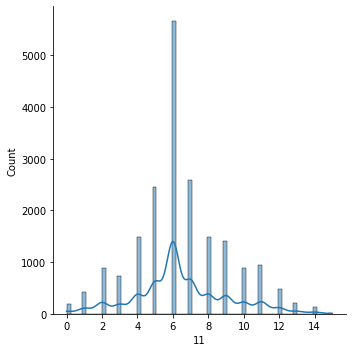

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


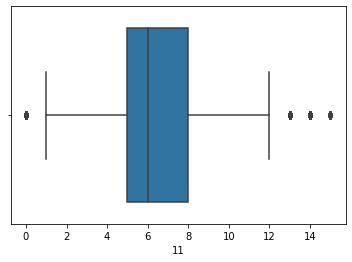

6.454


<Figure size 432x288 with 0 Axes>

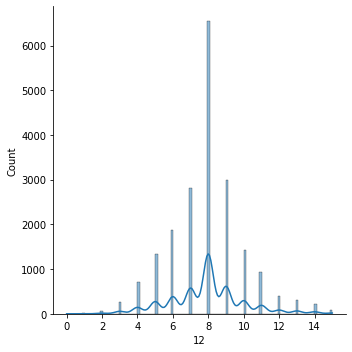

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


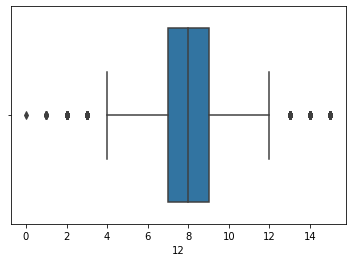

7.929


<Figure size 432x288 with 0 Axes>

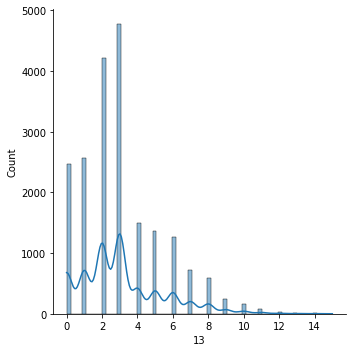

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


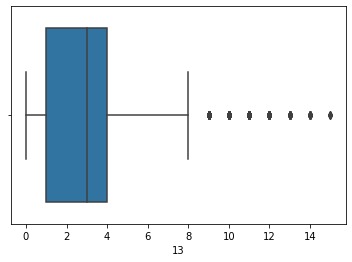

3.0461


<Figure size 432x288 with 0 Axes>

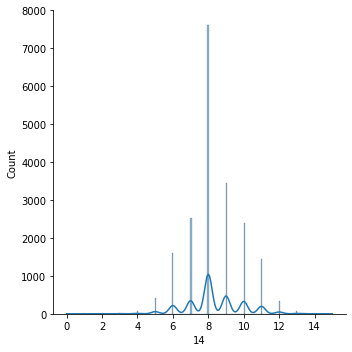

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


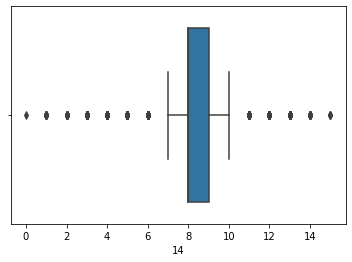

8.33885


<Figure size 432x288 with 0 Axes>

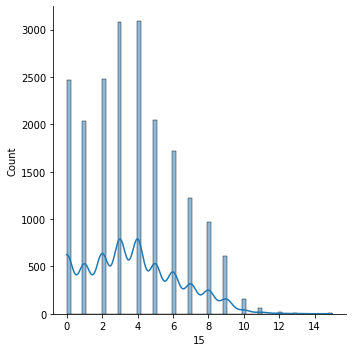

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


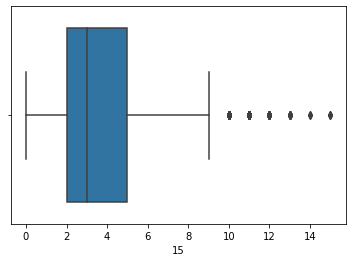

3.69175


<Figure size 432x288 with 0 Axes>

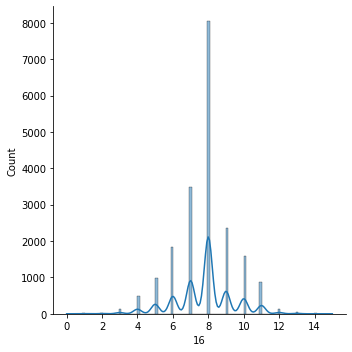

C:\Users\omistaja\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


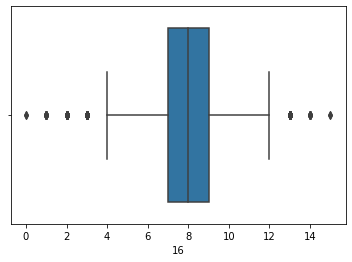

7.8012


In [41]:
df_noletter = df.drop("letter", axis=1)

for i in df_noletter: 
    inspection(df_noletter[i])

KstestResult(statistic=0.9075998680518208, pvalue=0.0)


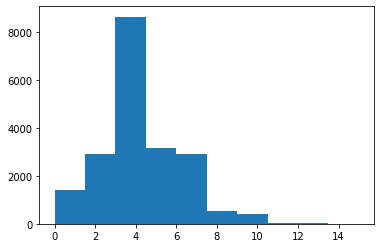

KstestResult(statistic=0.9028998680518208, pvalue=0.0)


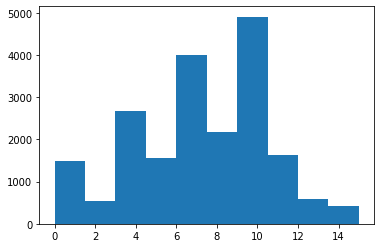

KstestResult(statistic=0.9482498680518208, pvalue=0.0)


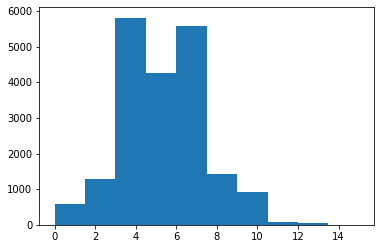

KstestResult(statistic=0.9148498680518208, pvalue=0.0)


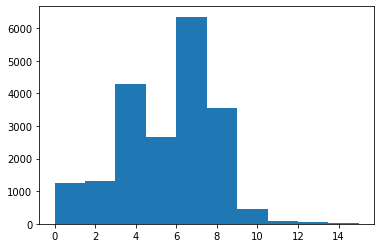

KstestResult(statistic=0.8138998680518208, pvalue=0.0)


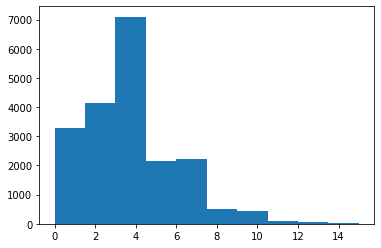

KstestResult(statistic=0.9739501019683698, pvalue=0.0)


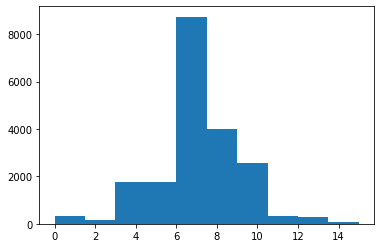

KstestResult(statistic=0.96995010196837, pvalue=0.0)


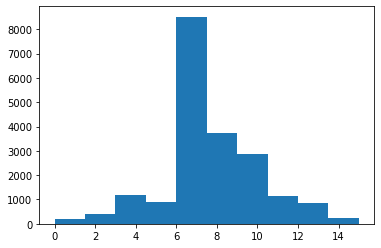

KstestResult(statistic=0.9019498680518208, pvalue=0.0)


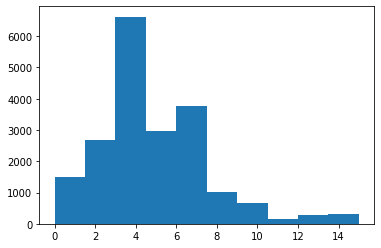

KstestResult(statistic=0.9226998680518208, pvalue=0.0)


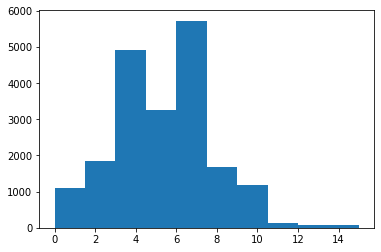

KstestResult(statistic=0.9834501019683699, pvalue=0.0)


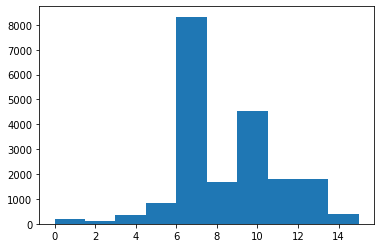

KstestResult(statistic=0.9463498680518208, pvalue=0.0)


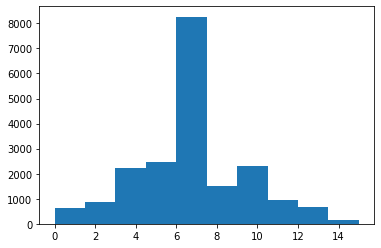

KstestResult(statistic=0.9948001019683699, pvalue=0.0)


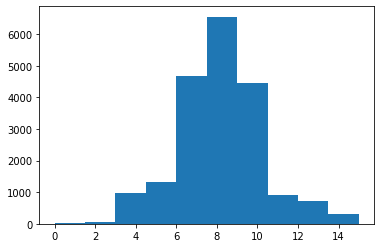

KstestResult(statistic=0.7257998680518207, pvalue=0.0)


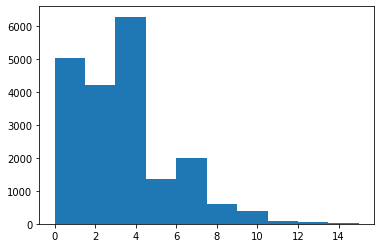

KstestResult(statistic=0.9971001019683698, pvalue=0.0)


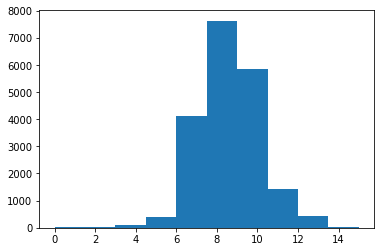

KstestResult(statistic=0.7516498680518208, pvalue=0.0)


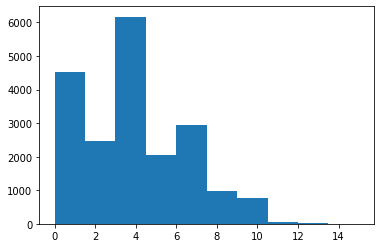

KstestResult(statistic=0.9962001019683699, pvalue=0.0)


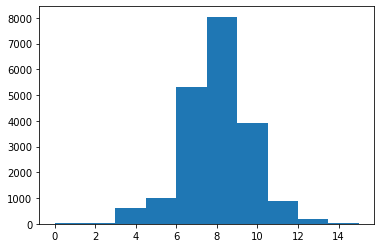

In [30]:
# test for gaussian distribution: kolmogorov-smirnov, histograms
for i in range(1,17):
    print(kstest(df[i], 'norm'))
    plt.hist(df[i])
    plt.show()
    
# Results show that the distribution of the data is not normal (p-value, histogram)